1. library import

In [1]:
import numpy as np
import pandas as pd

2. 드라이브 마운트 및 csv파일 업로드

In [2]:
from google.colab import drive
from google.colab import files

drive.mount('/lecture-2023ai')
files.upload()
nbastat = pd.read_csv('nbastat2022.csv')

Mounted at /lecture-2023ai


Saving nbastat2022.csv to nbastat2022.csv


3. 행 수와 컬럼 선택해보기

In [14]:
m = len(nbastat)

x = nbastat[['FGA']]  # 필드 슛 시도
y = nbastat[['FGM']]  # 슛 성공 개수

4. 결측값 처리

In [15]:
x = x.fillna(0)
y = y.fillna(0)

5. Numpy의 ndarray 형태로 변환


In [16]:
# Numpy로 변환
x = (np.array(x)).reshape(m, 1)
y = (np.array(y)).reshape(m, 1)

6. 그래프로 그려보기

Text(0, 0.5, 'FGM')

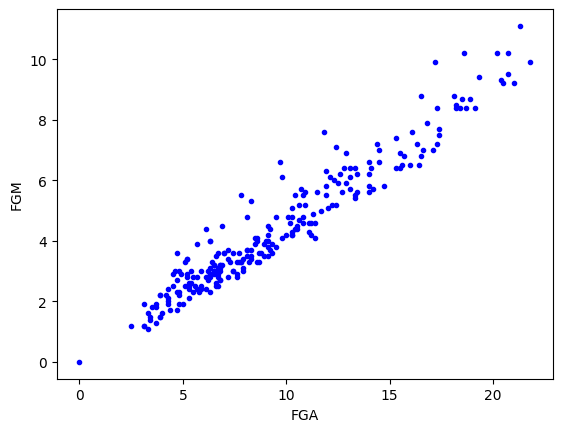

In [17]:
# 그려보기
import matplotlib.pyplot as plt
plt.plot(x, y, '.b')
plt.xlabel('FGA')
plt.ylabel('FGM')


7. 경사하강을 위해 알파값과 반복임계값(iter) 설정

In [18]:
# 10. 준비
learning_rate = 0.0001
n_iter = 949

8. 세타값과 계산할 Gradient 초기설정, 둘 다 1x2 형태의 벡터 형태이고, 여기서는 세타값은 (0,0)으로 설정하지만 좋은 시작점을 찾아서 경사하강을 실행하는 것이 좋다.<br><br>
y = ax+b의 선형 회귀 모델에서 a와 b를 결정하는 것이 우리의 목적이었다.<br>
x는 필드 슛 성공의 갯수들이었다. 
xb는 각각 세타0(=a) 과 세타1(=b) 의 계수이다.

In [19]:
#np.zeros((a,b)) : a * b의 Zero Matrix 생성
theta = np.zeros((2, 1)) # 세타
gradients = np.zeros((2, 1)) #손실값

x0 = np.ones((m, 1)) #np.ones : 1로 가득 찬 array를 생성함
xb = np.c_[x0, x] #np.c_ : 배열을 합침 [[1, x1], [1, x2], ...]

9. 경사하강법을 실행하여 훈련한다. <br>
초기값에서부터 MSE 손실함수를 세타0과 세타1에 대해 각각 편미분하여 Gradient를 계산한다. Gradient는 1x2의 벡터형태로 나온다. <br>
그리고 나서 각각의 세타값을 각각의 Gradient값에 따라서 학습률과 곱하여 이동(갱신)해준다.
<br>
반복할수록 Gradient가 줄어들고, 세타가 최소값에 수렴하는 것을 확인하면 경사하강 성공!

In [22]:
# 훈련
#np.dot(x,y) : 행렬 X와 Y의 곱
#np.T : 전치행렬
for i in range(n_iter):
  gradients = (1.0/m) * xb.T.dot(xb.dot(theta) - y)
  theta = theta - learning_rate * gradients
  if(i % 100 == 0):
    print('gradient', gradients)
    print('theta', theta)



gradient [[-0.01213209]
 [ 0.00103103]]
theta [[0.04122376]
 [0.45727478]]
gradient [[-0.01210948]
 [ 0.00102912]]
theta [[0.04134497]
 [0.45726448]]
gradient [[-0.01208692]
 [ 0.00102721]]
theta [[0.04146595]
 [0.4572542 ]]
gradient [[-0.0120644]
 [ 0.0010253]]
theta [[0.04158671]
 [0.45724394]]
gradient [[-0.01204192]
 [ 0.00102339]]
theta [[0.04170724]
 [0.4572337 ]]
gradient [[-0.01201948]
 [ 0.00102148]]
theta [[0.04182754]
 [0.45722347]]
gradient [[-0.01199709]
 [ 0.00101958]]
theta [[0.04194762]
 [0.45721327]]
gradient [[-0.01197473]
 [ 0.00101768]]
theta [[0.04206748]
 [0.45720308]]
gradient [[-0.01195242]
 [ 0.00101578]]
theta [[0.04218712]
 [0.45719291]]
gradient [[-0.01193015]
 [ 0.00101389]]
theta [[0.04230653]
 [0.45718277]]


10. 결과 확인

[6.90003229]


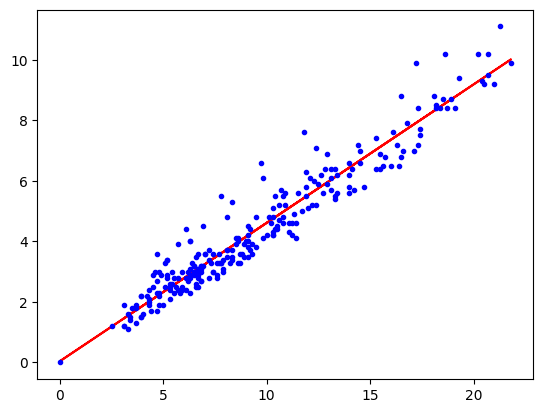

In [23]:
# 결과
y_pred = xb.dot(theta)
plt.plot(x, y_pred, color='Red')
plt.plot(x, y, '.b')

xtest = np.array([1, 15])
result = np.dot(xtest, theta)
print(result)